**IMPORT DATASET**

In [ ]:
!wget -O data.csv https://raw.githubusercontent.com/alifrzky123/belajar-orbit/17e51c35abc7bc52397430aea2f316856174755c/belajar_dataset/konsumen.csv

--2021-11-11 15:30:26--  https://raw.githubusercontent.com/alifrzky123/belajar-orbit/17e51c35abc7bc52397430aea2f316856174755c/belajar_dataset/konsumen.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5321884 (5.1M) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>]   5.08M  --.-KB/s    in 0.08s   

2021-11-11 15:30:27 (61.8 MB/s) - ‘data.csv’ saved [5321884/5321884]



**IMPORT LIBRARIES YANG DIBUTUHKAN**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**READ DATASET**

In [ ]:
df = pd.read_csv('data.csv', delimiter = ';')
df.head()

,SALES DATE,TYPE MOTOR,COLOR,KODE CUSTOMER,JENIS KELAMIN,TANGGAL LAHIR,KECAMATAN SURAT,KOTA SURAT,PROPINSI,STATUS RUMAH,JENIS PENJUALAN STNK,JENIS PENJUALAN SSU,BESAR DP,BESAR CICILAN,LAMA CICILAN,AGAMA,PEKERJAAN,PENGELUARAN,PENDIDIKAN,KEBERSEDIAAN DIHUBUNGI,MERK MOTOR SBLMNYA,TYPE MOTOR SBLMNYA,SMH DIGUNAKAN UNTUK,YG MENGGUNAKAN SMH,HOBI,KETERANGAN,KEWARGANEGARAAN
0,08/08/2019,REVO FIT FI,HITAM,INDIVIDUAL,LAKI-LAKI,25/08/1970,Manyar,Kab. Gresik,Jawa Timur,RUMAH SENDIRI,CASH,CASH,NaN,NaN,NaN,ISLAM,DOKTER,"RP 2.000.001,- S/D RP 3.000.000,-",AKADEMI/DIPLOMA,YES,HONDA,AT AUTOMATIC,BERDAGANG,SAYA SENDIRI,Adventure (Petualangan),NaN,WNI
1,16/10/2019,REVO FIT FI,HITAM,INDIVIDUAL,LAKI-LAKI,31/03/1972,Driyorejo,Kab. Gresik,Jawa Timur,RUMAH SENDIRI,CASH,CASH,NaN,NaN,NaN,ISLAM,"PEGAWAI SWASTA, INDUSTRI","RP 3.000.001,- S/D RP 4.000.000,-",SLTA/SMU,YES,HONDA,SPORT,BERDAGANG,SAYA SENDIRI,Adventure (Petualangan),NaN,WNI
2,07/10/2019,REVO FIT FI,HITAM,INDIVIDUAL,LAKI-LAKI,29/12/1998,Cerme,Kab. Gresik,Jawa Timur,RUMAH ORANG TUA / KELUARGA,CASH,CASH,NaN,NaN,NaN,ISLAM,MAHASISWA / PELAJAR,"RP 1.000.001,- S/D RP 1.500.000,-",SLTA/SMU,YES,HONDA,SPORT,BERDAGANG,SAYA SENDIRI,Adventure (Petualangan),NaN,WNI
3,09/09/2019,REVO FIT FI,HITAM,INDIVIDUAL,LAKI-LAKI,29/01/1983,Menganti,Kab. Gresik,Jawa Timur,RUMAH SENDIRI,CREDIT,CREDIT,1300000.0,634000.0,35.0,ISLAM,"PEGAWAI SWASTA, INDUSTRI","RP 1.000.001,- S/D RP 1.500.000,-",SLTA/SMU,YES,HONDA,AT AUTOMATIC,PEMAKAIAN JARAK DEKAT,SAYA SENDIRI,Makan,SOPAN,WNI
4,07/10/2019,REVO FIT FI,HITAM,INDIVIDUAL,LAKI-LAKI,19/01/1996,Panceng,Kab. Gresik,Jawa Timur,RUMAH SENDIRI,CASH,CASH,NaN,NaN,NaN,ISLAM,MAHASISWA / PELAJAR,"RP 1.000.001,- S/D RP 1.500.000,-",SLTA/SMU,YES,HONDA,SPORT,BERDAGANG,SAYA SENDIRI,Adventure (Petualangan),NaN,WNI


In [ ]:
df.tail()

,SALES DATE,TYPE MOTOR,COLOR,KODE CUSTOMER,JENIS KELAMIN,TANGGAL LAHIR,KECAMATAN SURAT,KOTA SURAT,PROPINSI,STATUS RUMAH,JENIS PENJUALAN STNK,JENIS PENJUALAN SSU,BESAR DP,BESAR CICILAN,LAMA CICILAN,AGAMA,PEKERJAAN,PENGELUARAN,PENDIDIKAN,KEBERSEDIAAN DIHUBUNGI,MERK MOTOR SBLMNYA,TYPE MOTOR SBLMNYA,SMH DIGUNAKAN UNTUK,YG MENGGUNAKAN SMH,HOBI,KETERANGAN,KEWARGANEGARAAN
18611,10/04/2019,CBR 250RR STD,HITAM,INDIVIDUAL,PEREMPUAN,26/11/1984,Wringinanom,Kab. Gresik,Jawa Timur,RUMAH SENDIRI,CASH,CASH,NaN,NaN,NaN,ISLAM,"PEGAWAI SWASTA, JASA","RP 2.000.001,- S/D RP 3.000.000,-",SLTA/SMU,YES,BELUM PERNAH MEMILIKI,BELUM PERNAH MEMILIKI,BERDAGANG,SAYA SENDIRI,Mengarang Cerita,BAIK,WNI
18612,02/08/2019,CBR 250RR ABS,HITAM,INDIVIDUAL,LAKI-LAKI,14/02/1994,Gresik,Kab. Gresik,Jawa Timur,RUMAH SEWA,CREDIT,CASH,NaN,NaN,NaN,ISLAM,"PEGAWAI SWASTA, INDUSTRI","RP 1.000.001,- S/D RP 1.500.000,-",SLTA/SMU,YES,YAMAHA,AT AUTOMATIC,LAIN-LAIN,PASANGAN SUAMI ATAU ISTRI,Membaca,NaN,WNI
18613,29/07/2019,CBR 250RR ABS,MERAH,INDIVIDUAL,LAKI-LAKI,23/06/1998,Benjeng,Kab. Gresik,Jawa Timur,RUMAH ORANG TUA / KELUARGA,CASH,CASH,NaN,NaN,NaN,ISLAM,"PEGAWAI SWASTA, INDUSTRI","RP 700.001,- S/D RP 1.000.000,-",SLTA/SMU,YES,HONDA,CUB BEBEK,BERDAGANG,SAYA SENDIRI,Adventure (Petualangan),NaN,WNI
18614,15/03/2019,SUPER CUB C125,BIRU-PUTIH,INDIVIDUAL,LAKI-LAKI,18/08/1992,Kebomas,Kab. Gresik,Jawa Timur,RUMAH ORANG TUA / KELUARGA,CREDIT,CASH,NaN,NaN,NaN,ISLAM,"PEGAWAI SWASTA, INDUSTRI","RP 2.000.001,- S/D RP 3.000.000,-",AKADEMI/DIPLOMA,YES,HONDA,AT AUTOMATIC,BERDAGANG,SAYA SENDIRI,Makan,NaN,WNI
18615,10/04/2019,SUPER CUB C125,BIRU-PUTIH,INDIVIDUAL,LAKI-LAKI,06/07/1986,Manyar,Kab. Gresik,Jawa Timur,RUMAH SENDIRI,CASH,CASH,NaN,NaN,NaN,ISLAM,"PEGAWAI SWASTA, PERDAGANGAN (RETAIL)","RP 2.000.001,- S/D RP 3.000.000,-",AKADEMI/DIPLOMA,NO,HONDA,AT AUTOMATIC,KEBUTUHAN KELUARGA,SAYA SENDIRI,Menanam Bunga,NaN,WNI


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18616 entries, 0 to 18615
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SALES DATE              18616 non-null  object 
 1   TYPE MOTOR              18616 non-null  object 
 2   COLOR                   18616 non-null  object 
 3   KODE CUSTOMER           18616 non-null  object 
 4   JENIS KELAMIN           18616 non-null  object 
 5   TANGGAL LAHIR           18616 non-null  object 
 6   KECAMATAN SURAT         18616 non-null  object 
 7   KOTA SURAT              18616 non-null  object 
 8   PROPINSI                18616 non-null  object 
 9   STATUS RUMAH            18616 non-null  object 
 10  JENIS PENJUALAN STNK    18616 non-null  object 
 11  JENIS PENJUALAN SSU     18616 non-null  object 
 12  BESAR DP                10928 non-null  float64
 13  BESAR CICILAN           10928 non-null  float64
 14  LAMA CICILAN            10928 non-null

In [ ]:
df = df.rename({'TYPE MOTOR':'TYPE_MOTOR'}, axis=1)

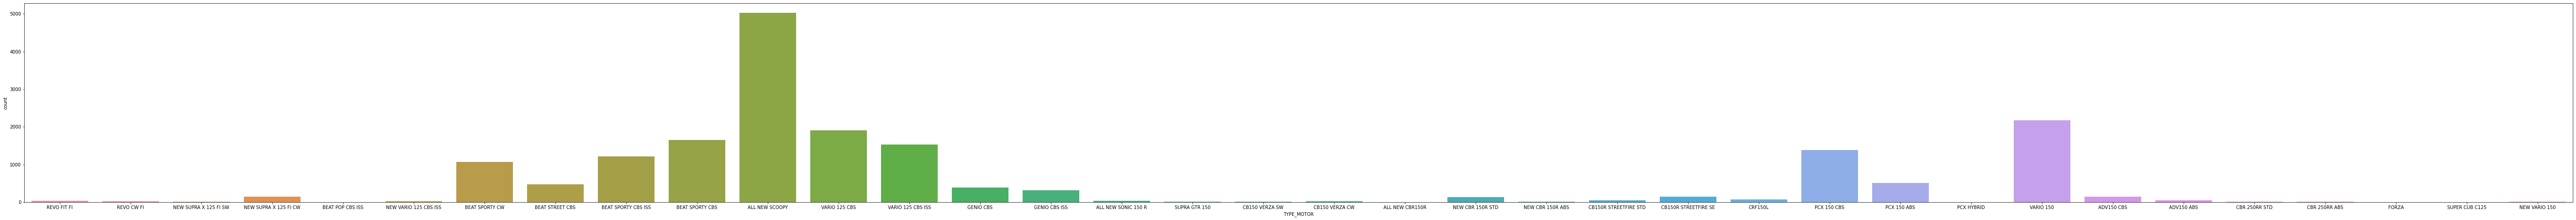

In [ ]:
# Visualisasikan kolom motor
dims = (100, 8)
fig, ax = plt.subplots(figsize=dims)
ax = sns.countplot(x=df.TYPE_MOTOR)

In [ ]:
df.isna().sum()

SALES DATE                    0
TYPE_MOTOR                    0
COLOR                         0
KODE CUSTOMER                 0
JENIS KELAMIN                 0
TANGGAL LAHIR                 0
KECAMATAN SURAT               0
KOTA SURAT                    0
PROPINSI                      0
STATUS RUMAH                  0
JENIS PENJUALAN STNK          0
JENIS PENJUALAN SSU           0
BESAR DP                   7688
BESAR CICILAN              7688
LAMA CICILAN               7688
AGAMA                         0
PEKERJAAN                     0
PENGELUARAN                   0
PENDIDIKAN                    0
KEBERSEDIAAN DIHUBUNGI        0
MERK MOTOR SBLMNYA            0
TYPE MOTOR SBLMNYA            0
SMH DIGUNAKAN UNTUK           0
YG MENGGUNAKAN SMH            0
HOBI                          0
KETERANGAN                11354
KEWARGANEGARAAN               6
dtype: int64

In [ ]:
df.shape

(18616, 27)

In [ ]:
x = df['TYPE_MOTOR']
df = df.drop(columns=['TYPE_MOTOR','TANGGAL LAHIR','LAMA CICILAN','BESAR DP','BESAR CICILAN','SALES DATE','KETERANGAN','KEWARGANEGARAAN'])

In [ ]:
df.head()

,COLOR,KODE CUSTOMER,JENIS KELAMIN,KECAMATAN SURAT,KOTA SURAT,PROPINSI,STATUS RUMAH,JENIS PENJUALAN STNK,JENIS PENJUALAN SSU,AGAMA,PEKERJAAN,PENGELUARAN,PENDIDIKAN,KEBERSEDIAAN DIHUBUNGI,MERK MOTOR SBLMNYA,TYPE MOTOR SBLMNYA,SMH DIGUNAKAN UNTUK,YG MENGGUNAKAN SMH,HOBI
0,HITAM,INDIVIDUAL,LAKI-LAKI,Manyar,Kab. Gresik,Jawa Timur,RUMAH SENDIRI,CASH,CASH,ISLAM,DOKTER,"RP 2.000.001,- S/D RP 3.000.000,-",AKADEMI/DIPLOMA,YES,HONDA,AT AUTOMATIC,BERDAGANG,SAYA SENDIRI,Adventure (Petualangan)
1,HITAM,INDIVIDUAL,LAKI-LAKI,Driyorejo,Kab. Gresik,Jawa Timur,RUMAH SENDIRI,CASH,CASH,ISLAM,"PEGAWAI SWASTA, INDUSTRI","RP 3.000.001,- S/D RP 4.000.000,-",SLTA/SMU,YES,HONDA,SPORT,BERDAGANG,SAYA SENDIRI,Adventure (Petualangan)
2,HITAM,INDIVIDUAL,LAKI-LAKI,Cerme,Kab. Gresik,Jawa Timur,RUMAH ORANG TUA / KELUARGA,CASH,CASH,ISLAM,MAHASISWA / PELAJAR,"RP 1.000.001,- S/D RP 1.500.000,-",SLTA/SMU,YES,HONDA,SPORT,BERDAGANG,SAYA SENDIRI,Adventure (Petualangan)
3,HITAM,INDIVIDUAL,LAKI-LAKI,Menganti,Kab. Gresik,Jawa Timur,RUMAH SENDIRI,CREDIT,CREDIT,ISLAM,"PEGAWAI SWASTA, INDUSTRI","RP 1.000.001,- S/D RP 1.500.000,-",SLTA/SMU,YES,HONDA,AT AUTOMATIC,PEMAKAIAN JARAK DEKAT,SAYA SENDIRI,Makan
4,HITAM,INDIVIDUAL,LAKI-LAKI,Panceng,Kab. Gresik,Jawa Timur,RUMAH SENDIRI,CASH,CASH,ISLAM,MAHASISWA / PELAJAR,"RP 1.000.001,- S/D RP 1.500.000,-",SLTA/SMU,YES,HONDA,SPORT,BERDAGANG,SAYA SENDIRI,Adventure (Petualangan)


In [ ]:
df['HOBI'].value_counts()

Adventure (Petualangan)           4074
Makan                             2908
Memasak                           2887
Memancing                         2518
Membaca                           1224
Sepakbola                          486
Bersepeda                          457
Melukis                            425
Jogging                            404
Chatting                           397
Membaca Puisi                      356
Massage                            336
Memelihara Binatang Peliharaan     259
Otomotif                           191
Bercocok Tanam                     180
Menanam Bunga                      164
Mengaji                            129
Badminton                          113
Menyanyi                            97
Shopping                            90
Travelling                          78
Menonton TV                         77
Menjahit                            73
Menggambar                          62
Berkaraoke                          62
Senam                    

In [ ]:
#Mengencode Data Kategorikal

list_1=list(df.columns)

In [ ]:
list_cate=[]
for i in list_1:
    if df[i].dtype=='object':
        list_cate.append(i)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
for i in list_cate:
    df[i]=le.fit_transform(df[i])

In [ ]:
df

,COLOR,KODE CUSTOMER,JENIS KELAMIN,KECAMATAN SURAT,KOTA SURAT,PROPINSI,STATUS RUMAH,JENIS PENJUALAN STNK,JENIS PENJUALAN SSU,AGAMA,PEKERJAAN,PENGELUARAN,PENDIDIKAN,KEBERSEDIAAN DIHUBUNGI,MERK MOTOR SBLMNYA,TYPE MOTOR SBLMNYA,SMH DIGUNAKAN UNTUK,YG MENGGUNAKAN SMH,HOBI
0,5,0,0,13,0,0,1,0,0,2,0,4,0,1,1,0,1,3,0
1,5,0,0,5,0,0,1,0,0,2,9,5,4,1,1,3,1,3,0
2,5,0,0,4,0,0,0,0,0,2,4,2,4,1,1,3,1,3,0
3,5,0,0,14,0,0,1,1,1,2,9,2,4,1,1,0,5,3,20
4,5,0,0,15,0,0,1,0,0,2,4,2,4,1,1,3,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18611,5,0,1,21,0,0,1,0,0,2,10,4,4,1,0,1,1,3,34
18612,5,0,0,9,0,0,2,1,0,2,9,2,4,1,5,0,4,2,25
18613,11,0,0,2,0,0,0,0,0,2,9,6,4,1,1,2,1,3,0
18614,2,0,0,10,0,0,0,1,0,2,9,4,0,1,1,0,1,3,20


In [ ]:
y=x #data terikat
x=df.drop(columns=["KODE CUSTOMER","KECAMATAN SURAT","KOTA SURAT","PROPINSI","AGAMA","PENGELUARAN"]) #data bebas

In [ ]:
x.value_counts()

COLOR  JENIS KELAMIN  STATUS RUMAH  JENIS PENJUALAN STNK  JENIS PENJUALAN SSU  PEKERJAAN  PENDIDIKAN  KEBERSEDIAAN DIHUBUNGI  MERK MOTOR SBLMNYA  TYPE MOTOR SBLMNYA  SMH DIGUNAKAN UNTUK  YG MENGGUNAKAN SMH  HOBI
5      0              1             1                     1                    9          4           1                       1                   3                   1                    3                   0       108
                                                                                                                                                  2                   5                    3                   23       97
       1              1             1                     1                    2          4           1                       1                   2                   5                    3                   24       61
       0              1             0                     0                    9          4           1                       1    

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [ ]:
clf = ExtraTreesClassifier(n_estimators=100)
print(clf)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False) 

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [ ]:
clf.fit(x_train, y_train)

score = clf.score(x_train, y_train)
print("Score: ", score)

Score:  0.8700644641418211


In [ ]:
cv_scores = cross_val_score(clf, x_train, y_train, cv=5 )
print("CV average score: %.2f" % cv_scores.mean())

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


CV average score: 0.66


In [ ]:
ypred = clf.predict(x_test)
cm = confusion_matrix(y_test, ypred)
print(cm)

[[  5   0   6 ...   0   0   0]
 [  0   9   2 ...   3   1   2]
 [  0   2 880 ...  17  19  11]
 ...
 [  0   3  25 ... 219  21  19]
 [  0   3  27 ...  18 196  29]
 [  0   1  29 ...  31  35 238]]


In [ ]:
0print("Enter value:")
COLOR = float(input("Warna preferensi : "))
JENIS_KELAMIN = float(input("Jenis kelamin : "))
STATUS_RUMAH = float(input("Status Rumah : "))
JENIS_PENJUALAN_STNK = float(input("Jenis Penjualan STNK : "))
JENIS_PENJUALAN_SSU = float(input("SSU : "))
PEKERJAAN = float(input("Pekerjaan : "))
PENDIDIKAN = float(input("Pendidikan : "))
KEBERSEDIAAN_DIHUBUNGI = float(input("Bersedia Dihubungi : "))
MERK_MOTOR_SEBELUMNYA = float(input("Merk Motor sebelumnya : "))
TYPE_MOTOR_SEBELUMNYA = float(input("Type Motor sebelumnya : "))
SMH_DIGUNAKAN_UNTUK = float(input("Akan digunakan untuk : "))
YG_MENGGUNAKAN_SMH = float(input("Siapa pengguna : "))
HOBI = float(input("Hobi : "))

output = clf.predict([[COLOR,JENIS_KELAMIN,STATUS_RUMAH,JENIS_PENJUALAN_STNK,
                       JENIS_PENJUALAN_SSU,PEKERJAAN,PENDIDIKAN,
                       KEBERSEDIAAN_DIHUBUNGI,MERK_MOTOR_SEBELUMNYA,
                       TYPE_MOTOR_SEBELUMNYA,SMH_DIGUNAKAN_UNTUK,YG_MENGGUNAKAN_SMH,HOBI]])
output

Enter value:
Warna preferensi : 1
Jenis kelamin : 0
Status Rumah : 1
Jenis Penjualan STNK : 0
SSU : 1
Pekerjaan : 0
Pendidikan : 1
Bersedia Dihubungi : 1
Merk Motor sebelumnya : 0
Type Motor sebelumnya : 1
Akan digunakan untuk : 1
Siapa pengguna : 1
Hobi : 1


array(['BEAT SPORTY CBS ISS'], dtype=object)